In [1]:
%load_ext autoreload
%autoreload 2

In [284]:
import pandas as pd

from utils.metrics import _get_metrics, _get_avg_metrics
from utils.metrics import get_best_threshold
from utils.metrics import get_classification_report
from utils.ensemble_metrics import get_ensemble_predictions_with_false, get_avg_ensemble_metrics

## MULTICLASS

### multiclass_00 | 2024_02_27__13_28_54

In [303]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_27__13_28_54/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8843
Recall macro 0.9052
Precision macro 0.8706
Balanced_Accuracy_Score 0.9052
roc_auc_macro_ovr 0.9943
tr 0.3347


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.997512,0.995025,0.993643,0.991708,0.997789,0.994748,0.992537,0.995854,0.993919,0.9947,0.0021,0.0000
1,Precision_0,0.996411,0.996126,0.997503,0.997775,0.995313,0.996953,0.998054,0.996956,0.997227,0.9969,0.0009,0.0000
2,F1_0,0.996961,0.995575,0.995569,0.994732,0.996549,0.995849,0.995288,0.996405,0.995570,0.9958,0.0007,0.0000
3,Recall_1,0.733333,0.733333,0.844444,0.844444,0.644444,0.800000,0.866667,0.800000,0.822222,0.7877,0.0712,0.0051
4,Precision_1,0.825000,0.660000,0.644068,0.558824,0.828571,0.679245,0.609375,0.750000,0.649123,0.6894,0.0932,0.0087
5,F1_1,0.776471,0.694737,0.730769,0.672566,0.725000,0.734694,0.715596,0.774194,0.725490,0.7277,0.0333,0.0011
6,Recall_2,0.960000,0.920000,0.920000,0.920000,0.960000,0.920000,0.960000,0.920000,0.920000,0.9333,0.0200,0.0004
7,Precision_2,0.923077,0.958333,0.920000,0.958333,0.923077,0.920000,0.923077,0.884615,0.920000,0.9256,0.0222,0.0005
8,F1_2,0.941176,0.938776,0.920000,0.938776,0.941176,0.920000,0.941176,0.901961,0.920000,0.9292,0.0142,0.0002
9,Recall_macro,0.896949,0.882786,0.919362,0.918718,0.867411,0.904916,0.939735,0.905285,0.912047,0.9052,0.0213,0.0005


              precision    recall  f1-score   support

           0     0.9969    0.9947    0.9958     32562
           1     0.6730    0.7877    0.7258       405
           2     0.9251    0.9333    0.9292       225

    accuracy                         0.9918     33192
   macro avg     0.8650    0.9052    0.8836     33192
weighted avg     0.9925    0.9918    0.9921     33192



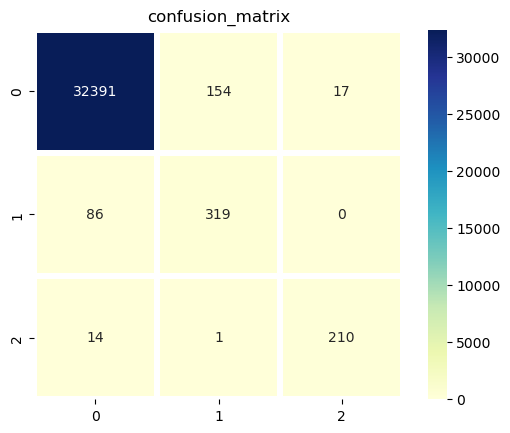

In [304]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_27__13_28_54/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_01 | 2024_02_23__15_16_58

In [246]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_23__15_16_58/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8834
Recall macro 0.9095
Precision macro 0.8666
Balanced_Accuracy_Score 0.9095
roc_auc_macro_ovr 0.9935
tr 0.5092


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.996407,0.993919,0.992814,0.993367,0.997512,0.996960,0.986733,0.997789,0.993090,0.9943,0.0035,0.0000
1,Precision_0,0.996132,0.996674,0.997778,0.997502,0.996136,0.997235,0.998043,0.996137,0.997225,0.9970,0.0007,0.0000
2,F1_0,0.996269,0.995295,0.995290,0.995430,0.996824,0.997097,0.992356,0.996962,0.995153,0.9956,0.0015,0.0000
3,Recall_1,0.711111,0.777778,0.844444,0.844444,0.733333,0.800000,0.866667,0.711111,0.800000,0.7877,0.0589,0.0035
4,Precision_1,0.744186,0.636364,0.612903,0.633333,0.804878,0.800000,0.469880,0.842105,0.610169,0.6838,0.1214,0.0147
5,F1_1,0.727273,0.700000,0.710280,0.723810,0.767442,0.800000,0.609375,0.771084,0.692308,0.7224,0.0556,0.0031
6,Recall_2,0.960000,0.920000,0.960000,0.920000,0.920000,0.960000,0.960000,0.960000,0.960000,0.9467,0.0200,0.0004
7,Precision_2,0.923077,0.920000,0.923077,0.920000,0.958333,0.923077,0.857143,0.923077,0.923077,0.9190,0.0261,0.0007
8,F1_2,0.941176,0.920000,0.941176,0.920000,0.938776,0.941176,0.905660,0.941176,0.941176,0.9323,0.0135,0.0002
9,Recall_macro,0.889173,0.897232,0.932419,0.919270,0.883615,0.918987,0.937800,0.889633,0.917697,0.9095,0.0200,0.0004


              precision    recall  f1-score   support

           0     0.9970    0.9943    0.9956     32562
           1     0.6564    0.7877    0.7160       405
           2     0.9181    0.9467    0.9322       225

    accuracy                         0.9914     33192
   macro avg     0.8572    0.9095    0.8813     33192
weighted avg     0.9923    0.9914    0.9918     33192



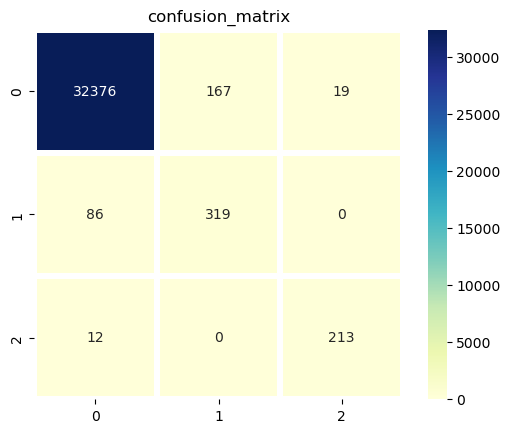

In [245]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_23__15_16_58/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_02 | 2024_02_23__17_22_36

In [247]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_23__17_22_36/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8778
Recall macro 0.9135
Precision macro 0.8529
Balanced_Accuracy_Score 0.9135
roc_auc_macro_ovr 0.9946
tr 0.5449


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.996130,0.993919,0.992814,0.993367,0.996683,0.992261,0.986733,0.996130,0.992814,0.9934,0.0030,0.0000
1,Precision_0,0.996130,0.997227,0.997778,0.997502,0.996133,0.997777,0.998043,0.996681,0.997224,0.9972,0.0007,0.0000
2,F1_0,0.996130,0.995570,0.995290,0.995430,0.996408,0.995011,0.992356,0.996406,0.995014,0.9953,0.0012,0.0000
3,Recall_1,0.711111,0.822222,0.844444,0.844444,0.733333,0.844444,0.866667,0.777778,0.800000,0.8049,0.0542,0.0029
4,Precision_1,0.727273,0.637931,0.612903,0.633333,0.750000,0.593750,0.469880,0.729167,0.620690,0.6417,0.0865,0.0075
5,F1_1,0.719101,0.718447,0.710280,0.723810,0.741573,0.697248,0.609375,0.752688,0.699029,0.7080,0.0411,0.0017
6,Recall_2,0.960000,0.920000,0.960000,0.920000,0.920000,0.960000,0.960000,0.920000,0.960000,0.9422,0.0211,0.0004
7,Precision_2,0.923077,0.958333,0.923077,0.920000,0.958333,0.923077,0.857143,0.958333,0.857143,0.9198,0.0393,0.0015
8,F1_2,0.941176,0.938776,0.941176,0.920000,0.938776,0.941176,0.905660,0.938776,0.905660,0.9301,0.0154,0.0002
9,Recall_macro,0.889081,0.912047,0.932419,0.919270,0.883339,0.932235,0.937800,0.897969,0.917605,0.9135,0.0197,0.0004


### multiclass_03 | 2024_02_24__08_57_59

In [248]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_24__08_57_59/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8836
Recall macro 0.8824
Precision macro 0.8899
Balanced_Accuracy_Score 0.8824
roc_auc_macro_ovr 0.9942
tr 0.9791


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.997512,0.995578,0.995854,0.994472,0.998342,0.996407,0.994748,0.998618,0.994748,0.9963,0.0016,0.0000
1,Precision_0,0.994763,0.996128,0.997232,0.997228,0.995041,0.995306,0.996401,0.995043,0.996677,0.9960,0.0010,0.0000
2,F1_0,0.996136,0.995853,0.996543,0.995848,0.996689,0.995856,0.995574,0.996827,0.995712,0.9961,0.0005,0.0000
3,Recall_1,0.600000,0.733333,0.800000,0.822222,0.644444,0.644444,0.733333,0.622222,0.777778,0.7086,0.0827,0.0068
4,Precision_1,0.794118,0.687500,0.734694,0.672727,0.852941,0.725000,0.673469,0.875000,0.673077,0.7432,0.0793,0.0063
5,F1_1,0.683544,0.709677,0.765957,0.740000,0.734177,0.682353,0.702128,0.727273,0.721649,0.7185,0.0272,0.0007
6,Recall_2,0.960000,0.920000,0.960000,0.920000,0.920000,0.960000,0.960000,0.960000,0.920000,0.9422,0.0211,0.0004
7,Precision_2,0.923077,0.958333,0.923077,0.920000,0.958333,0.923077,0.888889,0.960000,0.920000,0.9305,0.0238,0.0006
8,F1_2,0.941176,0.938776,0.941176,0.920000,0.938776,0.941176,0.923077,0.960000,0.920000,0.9360,0.0130,0.0002
9,Recall_macro,0.852504,0.882970,0.918618,0.912231,0.854262,0.866950,0.896027,0.860280,0.897509,0.8824,0.0251,0.0006


              precision    recall  f1-score   support

           0     0.9960    0.9963    0.9961     32562
           1     0.7303    0.7086    0.7193       405
           2     0.9298    0.9422    0.9360       225

    accuracy                         0.9924     33192
   macro avg     0.8854    0.8824    0.8838     33192
weighted avg     0.9923    0.9924    0.9923     33192



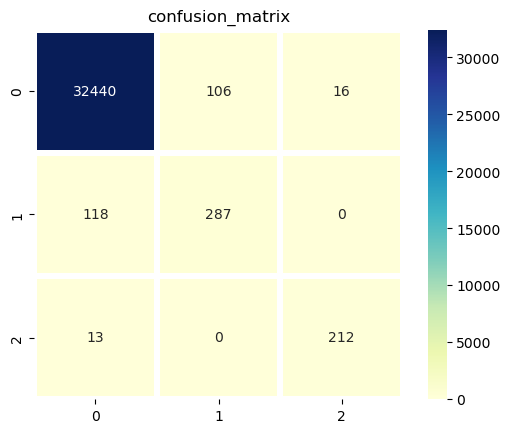

In [249]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_24__08_57_59/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_04 | 2024_02_24__08_59_55

In [250]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_24__08_59_55/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8876
Recall macro 0.8802
Precision macro 0.9002
Balanced_Accuracy_Score 0.8802
roc_auc_macro_ovr 0.9939
tr 0.9662


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.997789,0.996407,0.995025,0.995578,0.999171,0.997236,0.996130,0.997512,0.995301,0.9967,0.0014,0.0000
1,Precision_0,0.995313,0.996132,0.996954,0.997231,0.993951,0.996135,0.995580,0.996411,0.996679,0.9960,0.0010,0.0000
2,F1_0,0.996549,0.996269,0.995988,0.996404,0.996554,0.996685,0.995855,0.996961,0.995989,0.9964,0.0004,0.0000
3,Recall_1,0.733333,0.733333,0.777778,0.822222,0.555556,0.733333,0.666667,0.755556,0.777778,0.7284,0.0776,0.0060
4,Precision_1,0.846154,0.750000,0.686275,0.725490,0.925926,0.785714,0.731707,0.809524,0.686275,0.7719,0.0789,0.0062
5,F1_1,0.785714,0.741573,0.729167,0.770833,0.694444,0.758621,0.697674,0.781609,0.729167,0.7432,0.0338,0.0011
6,Recall_2,0.800000,0.920000,0.960000,0.920000,0.920000,0.920000,0.960000,0.920000,0.920000,0.9156,0.0467,0.0022
7,Precision_2,0.909091,0.920000,0.923077,0.920000,0.958333,0.958333,0.888889,0.958333,0.958333,0.9327,0.0263,0.0007
8,F1_2,0.851064,0.920000,0.941176,0.920000,0.938776,0.938776,0.923077,0.938776,0.938776,0.9234,0.0285,0.0008
9,Recall_macro,0.843707,0.883247,0.910934,0.912600,0.824909,0.883523,0.874266,0.891023,0.897693,0.8802,0.0293,0.0009


              precision    recall  f1-score   support

           0     0.9960    0.9967    0.9964     32562
           1     0.7603    0.7284    0.7440       405
           2     0.9321    0.9156    0.9238       225

    accuracy                         0.9929     33192
   macro avg     0.8962    0.8802    0.8880     33192
weighted avg     0.9927    0.9929    0.9928     33192



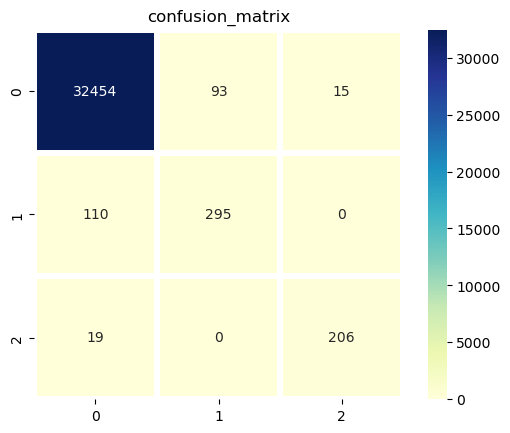

In [251]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_24__08_59_55/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_05 | 2024_02_25__08_20_52

In [252]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_25__08_20_52/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8908
Recall macro 0.8805
Precision macro 0.9063
Balanced_Accuracy_Score 0.8805
roc_auc_macro_ovr 0.9931
tr 0.9627


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.998342,0.996683,0.995578,0.996960,0.998894,0.997236,0.996130,0.997512,0.995025,0.9969,0.0012,0.0000
1,Precision_0,0.995316,0.996133,0.997231,0.996409,0.993676,0.996135,0.995580,0.996411,0.996678,0.9960,0.0010,0.0000
2,F1_0,0.996826,0.996408,0.996404,0.996684,0.996278,0.996685,0.995855,0.996961,0.995851,0.9964,0.0004,0.0000
3,Recall_1,0.666667,0.733333,0.800000,0.733333,0.533333,0.733333,0.666667,0.755556,0.777778,0.7111,0.0801,0.0064
4,Precision_1,0.857143,0.750000,0.720000,0.767442,0.888889,0.785714,0.731707,0.809524,0.673077,0.7759,0.0680,0.0046
5,F1_1,0.750000,0.741573,0.757895,0.750000,0.666667,0.758621,0.697674,0.781609,0.721649,0.7362,0.0353,0.0012
6,Recall_2,0.920000,0.920000,0.960000,0.960000,0.920000,0.920000,0.960000,0.920000,0.920000,0.9333,0.0200,0.0004
7,Precision_2,0.958333,0.958333,0.923077,0.960000,0.958333,0.958333,0.888889,0.958333,0.958333,0.9469,0.0247,0.0006
8,F1_2,0.938776,0.938776,0.941176,0.960000,0.938776,0.938776,0.923077,0.938776,0.938776,0.9397,0.0093,0.0001
9,Recall_macro,0.861669,0.883339,0.918526,0.896764,0.817409,0.883523,0.874266,0.891023,0.897601,0.8805,0.0285,0.0008


              precision    recall  f1-score   support

           0     0.9960    0.9969    0.9964     32562
           1     0.7660    0.7111    0.7375       405
           2     0.9459    0.9333    0.9396       225

    accuracy                         0.9930     33192
   macro avg     0.9026    0.8805    0.8912     33192
weighted avg     0.9928    0.9930    0.9929     33192



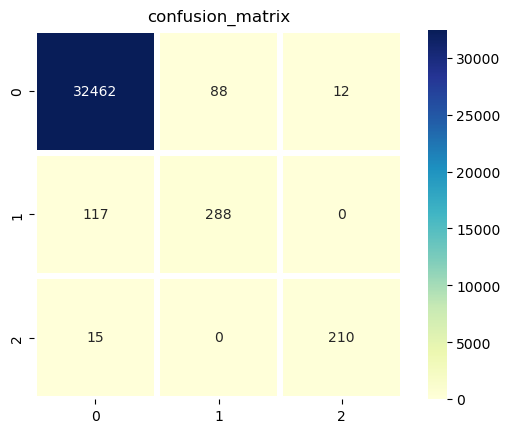

In [254]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_25__08_20_52/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_06 | 2024_02_25__08_21_41

In [255]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_25__08_21_41/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.889
Recall macro 0.8883
Precision macro 0.8927
Balanced_Accuracy_Score 0.8883
roc_auc_macro_ovr 0.9931
tr 0.9128


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.997512,0.995854,0.995301,0.996407,0.998342,0.996407,0.995025,0.997512,0.994748,0.9963,0.0012,0.0000
1,Precision_0,0.994489,0.996129,0.997507,0.996682,0.995316,0.996132,0.996402,0.996686,0.996677,0.9962,0.0009,0.0000
2,F1_0,0.995998,0.995992,0.996403,0.996545,0.996826,0.996269,0.995713,0.997099,0.995712,0.9963,0.0005,0.0000
3,Recall_1,0.577778,0.733333,0.822222,0.755556,0.666667,0.733333,0.733333,0.777778,0.777778,0.7309,0.0715,0.0051
4,Precision_1,0.787879,0.717391,0.725490,0.739130,0.857143,0.733333,0.687500,0.813953,0.660377,0.7469,0.0622,0.0039
5,F1_1,0.666667,0.725275,0.770833,0.747253,0.750000,0.733333,0.709677,0.795455,0.714286,0.7348,0.0373,0.0014
6,Recall_2,0.960000,0.920000,0.960000,0.960000,0.920000,0.920000,0.960000,0.920000,0.920000,0.9378,0.0211,0.0004
7,Precision_2,0.923077,0.920000,0.888889,0.960000,0.958333,0.958333,0.888889,0.958333,0.958333,0.9349,0.0305,0.0009
8,F1_2,0.941176,0.920000,0.923077,0.960000,0.938776,0.938776,0.923077,0.938776,0.938776,0.9358,0.0124,0.0002
9,Recall_macro,0.845097,0.883062,0.925841,0.903987,0.861669,0.883247,0.896119,0.898430,0.897509,0.8883,0.0238,0.0006


              precision    recall  f1-score   support

           0     0.9962    0.9963    0.9963     32562
           1     0.7400    0.7309    0.7354       405
           2     0.9336    0.9378    0.9357       225

    accuracy                         0.9927     33192
   macro avg     0.8900    0.8883    0.8891     33192
weighted avg     0.9927    0.9927    0.9927     33192



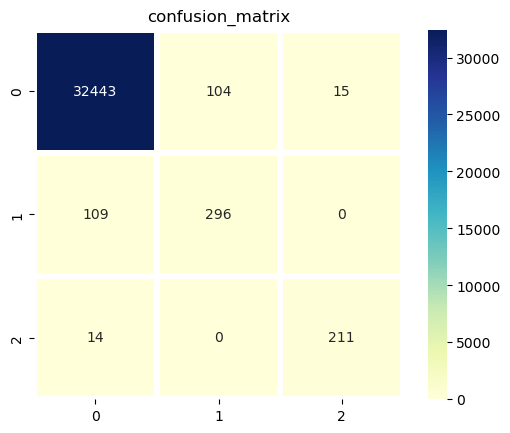

In [256]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_25__08_21_41/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_07 | 2024_02_26__10_16_38

In [298]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_26__10_16_38/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8921
Recall macro 0.8877
Precision macro 0.8985
Balanced_Accuracy_Score 0.8877
roc_auc_macro_ovr 0.9925
tr 0.8656


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.996960,0.997512,0.997236,0.996683,0.996407,0.996683,0.997512,0.997236,0.996130,0.9969,0.0005,0.0000
1,Precision_0,0.995309,0.995586,0.996410,0.995857,0.996132,0.996683,0.996136,0.996410,0.996130,0.9961,0.0004,0.0000
2,F1_0,0.996134,0.996548,0.996823,0.996270,0.996269,0.996683,0.996824,0.996823,0.996130,0.9965,0.0003,0.0000
3,Recall_1,0.644444,0.666667,0.733333,0.688889,0.711111,0.755556,0.711111,0.733333,0.711111,0.7062,0.0347,0.0012
4,Precision_1,0.763158,0.810811,0.804878,0.756098,0.761905,0.772727,0.820513,0.804878,0.727273,0.7802,0.0313,0.0010
5,F1_1,0.698795,0.731707,0.767442,0.720930,0.735632,0.764045,0.761905,0.767442,0.719101,0.7408,0.0254,0.0006
6,Recall_2,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.9600,0.0000,0.0000
7,Precision_2,0.923077,0.923077,0.923077,0.923077,0.888889,0.923077,0.923077,0.923077,0.923077,0.9193,0.0114,0.0001
8,F1_2,0.941176,0.941176,0.941176,0.941176,0.923077,0.941176,0.941176,0.941176,0.941176,0.9392,0.0060,0.0000
9,Recall_macro,0.867135,0.874726,0.896856,0.881857,0.889173,0.904080,0.889541,0.896856,0.889081,0.8877,0.0116,0.0001


              precision    recall  f1-score   support

           0     0.9961    0.9969    0.9965     32562
           1     0.7793    0.7062    0.7409       405
           2     0.9191    0.9600    0.9391       225

    accuracy                         0.9931     33192
   macro avg     0.8982    0.8877    0.8922     33192
weighted avg     0.9929    0.9931    0.9930     33192



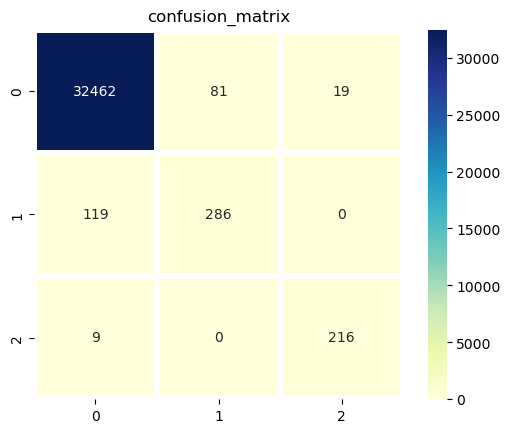

In [301]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_26__10_16_38/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_08 | 2024_02_26__10_17_25

In [300]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_26__10_17_25/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.8185
Recall macro 0.8126
Precision macro 0.8504
Balanced_Accuracy_Score 0.8126
roc_auc_macro_ovr 0.9858
tr 0.5541


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.996130,0.996683,0.995301,0.995578,0.995854,0.995578,0.996407,0.995301,0.995578,0.9958,0.0005,0.0000
1,Precision_0,0.995580,0.995583,0.995576,0.995303,0.995579,0.995853,0.995581,0.995576,0.995578,0.9956,0.0001,0.0000
2,F1_0,0.995855,0.996133,0.995439,0.995440,0.995716,0.995715,0.995994,0.995439,0.995578,0.9957,0.0003,0.0000
3,Recall_1,0.666667,0.666667,0.666667,0.644444,0.666667,0.688889,0.644444,0.666667,0.666667,0.6642,0.0134,0.0002
4,Precision_1,0.666667,0.731707,0.638298,0.630435,0.461538,0.645833,0.707317,0.576923,0.666667,0.6362,0.0792,0.0063
5,F1_1,0.666667,0.697674,0.652174,0.637363,0.545455,0.666667,0.674419,0.618557,0.666667,0.6473,0.0443,0.0020
6,Recall_2,0.840000,0.920000,0.880000,0.840000,0.160000,0.840000,0.920000,0.680000,0.920000,0.7778,0.2434,0.0592
7,Precision_2,0.913043,0.920000,0.916667,0.913043,1.000000,0.913043,0.884615,0.894737,0.920000,0.9195,0.0325,0.0011
8,F1_2,0.875000,0.920000,0.897959,0.875000,0.275862,0.875000,0.901961,0.772727,0.920000,0.8126,0.2061,0.0425
9,Recall_macro,0.834266,0.861117,0.847323,0.826674,0.607507,0.841489,0.853617,0.780656,0.860748,0.8126,0.0807,0.0065


              precision    recall  f1-score   support

           0     0.9956    0.9958    0.9957     32562
           1     0.6256    0.6642    0.6443       405
           2     0.9115    0.7778    0.8393       225

    accuracy                         0.9903     33192
   macro avg     0.8442    0.8126    0.8264     33192
weighted avg     0.9905    0.9903    0.9904     33192



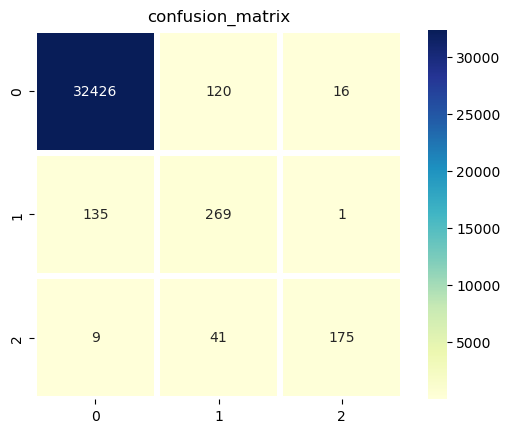

In [302]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_26__10_17_25/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)

### multiclass_09 | 2024_02_27__08_31_09

In [305]:
test_metrics = pd.read_csv("mlruns/multiclass/2024_02_27__08_31_09/predictions/test_metrics_f1.csv")
print("F1 macro", test_metrics[test_metrics.metric == "F1_macro"]["mean"].item())
print("Recall macro", test_metrics[test_metrics.metric == "Recall_macro"]["mean"].item())
print("Precision macro", test_metrics[test_metrics.metric == "Precision_macro"]["mean"].item())
print("Balanced_Accuracy_Score", test_metrics[test_metrics.metric == "Balanced_Accuracy_Score"]["mean"].item())
print("roc_auc_macro_ovr", test_metrics[test_metrics.metric == "roc_auc_macro_ovr"]["mean"].item())
print("tr", test_metrics[test_metrics.metric == "tr"]["mean"].item())
test_metrics

F1 macro 0.9014
Recall macro 0.9113
Precision macro 0.8949
Balanced_Accuracy_Score 0.9113
roc_auc_macro_ovr 0.9947
tr 0.8422


,metric,1,2,3,4,5,6,7,8,9,mean,std,var
0,Recall_0,0.998065,0.995301,0.993367,0.994472,0.998065,0.997789,0.996407,0.997512,0.995025,0.9962,0.0017,0.0000
1,Precision_0,0.996413,0.996955,0.998056,0.997505,0.995863,0.996962,0.996958,0.997237,0.996678,0.9970,0.0006,0.0000
2,F1_0,0.997238,0.996127,0.995706,0.995986,0.996963,0.997375,0.996682,0.997375,0.995851,0.9966,0.0007,0.0000
3,Recall_1,0.733333,0.777778,0.866667,0.822222,0.688889,0.777778,0.777778,0.800000,0.755556,0.7778,0.0509,0.0026
4,Precision_1,0.846154,0.700000,0.650000,0.672727,0.861111,0.833333,0.777778,0.818182,0.680000,0.7599,0.0840,0.0071
5,F1_1,0.785714,0.736842,0.742857,0.740000,0.765432,0.804598,0.777778,0.808989,0.715789,0.7642,0.0324,0.0011
6,Recall_2,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.960000,0.9600,0.0000,0.0000
7,Precision_2,0.960000,0.923077,0.888889,0.923077,0.923077,0.960000,0.888889,0.960000,0.923077,0.9278,0.0279,0.0008
8,F1_2,0.960000,0.941176,0.923077,0.941176,0.941176,0.960000,0.923077,0.960000,0.941176,0.9434,0.0145,0.0002
9,Recall_macro,0.897133,0.911026,0.940011,0.925565,0.882318,0.911856,0.911395,0.919171,0.903527,0.9113,0.0166,0.0003


              precision    recall  f1-score   support

           0     0.9970    0.9962    0.9966     32562
           1     0.7482    0.7778    0.7627       405
           2     0.9270    0.9600    0.9432       225

    accuracy                         0.9933     33192
   macro avg     0.8907    0.9113    0.9008     33192
weighted avg     0.9934    0.9933    0.9934     33192



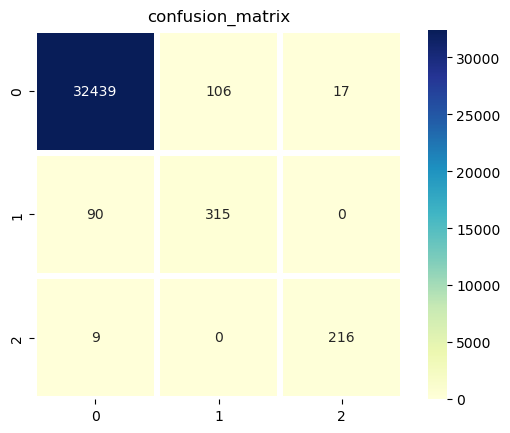

In [306]:
test_predictions = pd.read_csv("mlruns/multiclass/2024_02_27__08_31_09/predictions/test_predictions_f1.csv")
y_true = test_predictions.y_true.tolist()
y_pred = test_predictions.y_pred.tolist()
get_classification_report(y_true, y_pred, plot=True)